In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [2]:
data = pd.read_csv('../Resultados/tabelas/Demandas_treinamento/demandas')[['date','demandas']]
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')
data.head(3)

,demandas
date,
2015-01-01,91
2015-01-08,87
2015-01-15,89


$d_{i} = 100+10\cos\left(\frac{2\pi\left(i+10\right)}{50}+0.6\pi\right)+e_{i}$

$e_{i} \sim N\left(0,1\right)$

$i=1,...,52$

In [3]:
data.index[208]

Timestamp('2018-12-27 00:00:00')

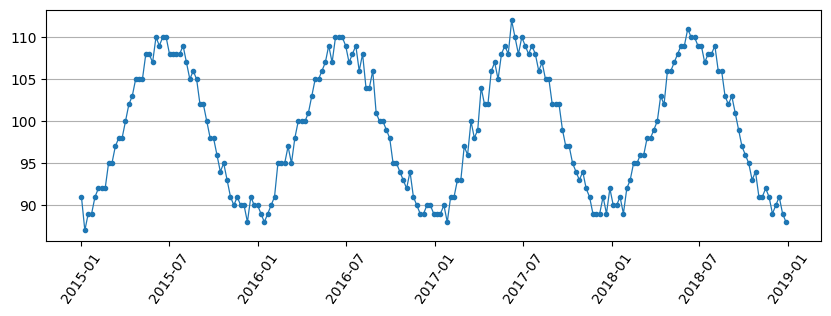

In [4]:
fig=plt.figure(figsize=(10,3))


ax=fig.add_subplot(1,1,1)


plt.plot(data,marker='.',linewidth=0.9)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)

'''
ax=fig.add_subplot(1,2,2)
ax.patch.set_alpha(0)
plt.hist(data,orientation='horizontal',alpha = 0.4)
plt.tick_params(axis='y', labelsize=0, length=0)
plt.tick_params(axis='x', labelsize=0, length=0)
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
'''
plt.grid(axis='y')
plt.savefig('../Resultados/img/Demandas.png', format='png', bbox_inches='tight',pad_inches = 0.1)

# Correlação

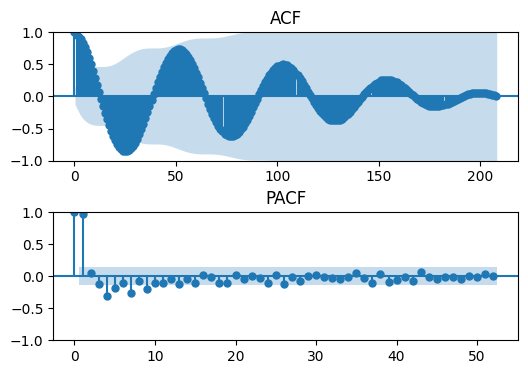

In [5]:
fig=plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0, hspace=0.4)


ax=fig.add_subplot(2,1,1)
plot_acf(data,title='ACF',lags=208,alpha=.05,ax=ax)

ax=fig.add_subplot(2,1,2)
plot_pacf(data,title='PACF',lags=52,ax=ax)

plt.savefig('../Resultados/img/ACF_PACF.png', bbox_inches='tight',pad_inches = 0.1,format='png')

plt.show()

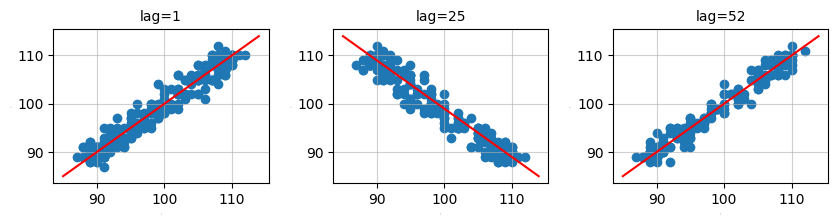

In [6]:
fig=plt.figure(figsize=(10,2))
plt.subplots_adjust(wspace=0.3, hspace=0)
#fig.suptitle('Lag plot')

indice = 1
for i in [1,25,52]:
    ax=fig.add_subplot(1,3,indice)
    plt.grid(alpha=0.6)
    pd.plotting.lag_plot(data, lag=i)
    if(indice == 2):
        plt.plot(list(range(85,115)),list(reversed(range(85,115))),color='red')
    if(indice == 1 or indice == 3):
        plt.plot(range(85,115),range(85,115),color='red')
    plt.title(f"lag={i}",fontsize=10)
    #plt.xticks([])
    #plt.yticks([])
    plt.xlabel([],fontsize=0)
    plt.ylabel([],fontsize=0)
    indice += 1



plt.savefig('../Resultados/img/LagPlot.png', format='png', bbox_inches='tight',pad_inches = 0.1)
plt.show(block=True)

# Decomposição

In [7]:
decom = seasonal_decompose(data)

## Sazonalidade

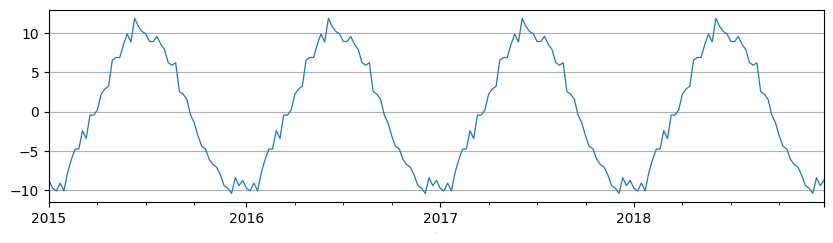

In [8]:
decom.seasonal.plot(figsize=(10,2.5),linewidth=0.9)
plt.xlabel([], fontsize=0)
plt.grid(axis='y')
plt.savefig('../Resultados/img/Sazonal.png', format='png', bbox_inches='tight',pad_inches = 0.1)

<Axes: xlabel='date'>

<Figure size 600x200 with 0 Axes>

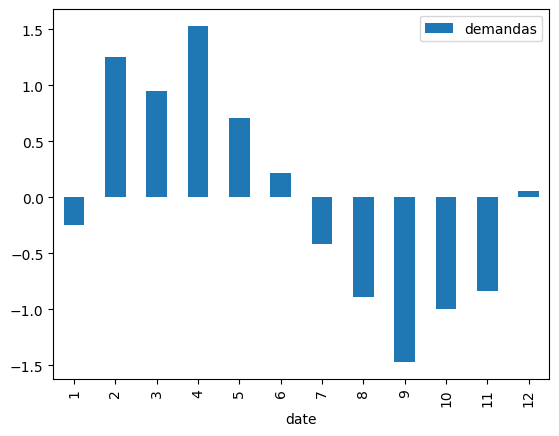

In [9]:
fig=plt.figure(figsize=(6,2))
data.diff().groupby(data.index.month).mean().plot(kind='bar')

## Resíduo

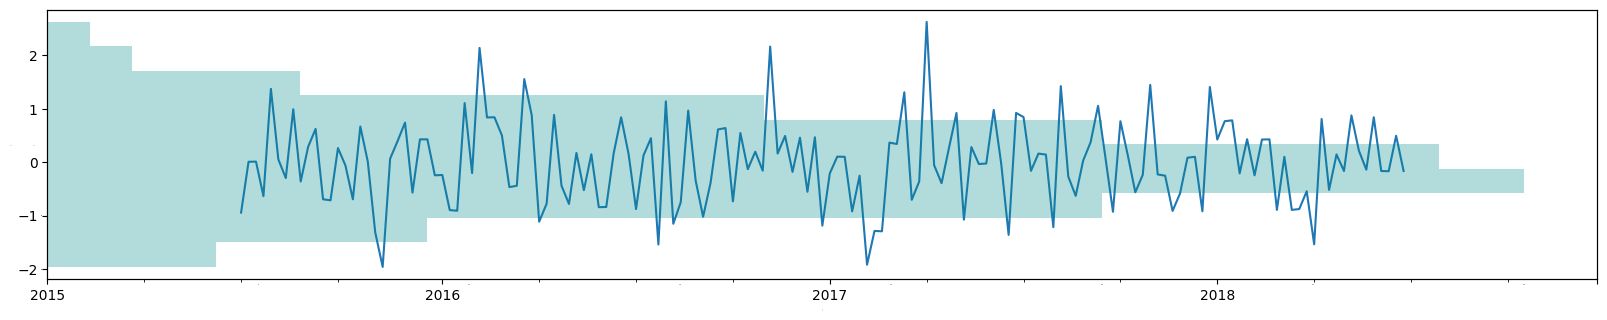

In [10]:
fig=plt.figure(figsize=(10,3))
plt.subplots_adjust(wspace=-1, hspace=0)


ax=fig.add_subplot(1,2,1)
decom.resid.plot(figsize=(20,3.5))
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)

ax=fig.add_subplot(1,2,2)
ax.patch.set_alpha(0)
plt.hist(decom.resid,orientation='horizontal',alpha = 0.3,color='darkcyan')
plt.tick_params(axis='y', labelsize=0, length=0)
plt.tick_params(axis='x', labelsize=0, length=0)
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)

plt.savefig('../Resultados/img/Ruido.png', format='png', bbox_inches='tight',pad_inches = 0.1)

## Tendência

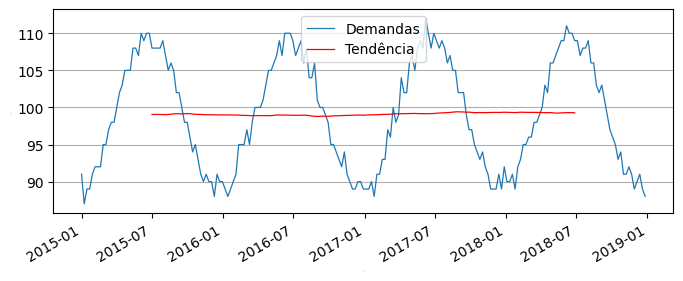

In [11]:
fig=plt.figure(figsize=(8,3))
plt.plot(data,label='Demandas',linewidth=0.9)
decom.trend.plot(label='Tendência',color='red',linewidth=0.9)
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
plt.grid(axis='y')
plt.legend()

plt.savefig('../Resultados/img/Tendencia.png', format='png', bbox_inches='tight',pad_inches = 0.1)

# Teste de Estacionariedade

Se p-valor<0.05 então rejeita $H_{0}$

## Augmented Dickey Fuller

$H_{0}$: a série contém raiz unitária

$H_{1}$: a série não contém raiz unitária

In [12]:
result = adfuller(data) 

print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:')   

for key, value in result[4].items():  
    print('\t%s: %.3f' % (key, value))

if(result[1]<=0.05):
    print(r'Possuímos evidências de que é estacionária')
else:
    print(r'Não possuímos evidências de que é estacionária')

ADF Statistic: -8.145162
p-value: 0.000000
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575
Possuímos evidências de que é estacionária


## Kwiatkowski-Phillips-Schmidt-Shin

$H_{0}$: a série não contém raiz unitária

$H_{1}$: a série contém raiz unitária

In [13]:
result = kpss(data) 

print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:')   

for key, value in result[3].items():     
    print('\t%s: %.3f' % (key, value))


if(result[1]<=0.05):
    print(r'Não possuímos evidências de que é estacionária')
else:
    print(r'Possuímos evidências de que é estacionária')

ADF Statistic: 0.038951
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Possuímos evidências de que é estacionária


C:\Users\marci\AppData\Local\Temp\ipykernel_8352\1697168023.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(data)


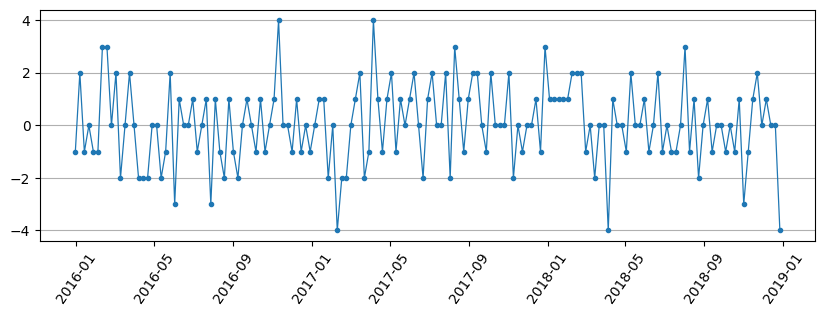

In [29]:
fig=plt.figure(figsize=(10,3))


ax=fig.add_subplot(1,1,1)


plt.plot(data.diff(52),marker='.',linewidth=0.9)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)

plt.grid(axis='y')

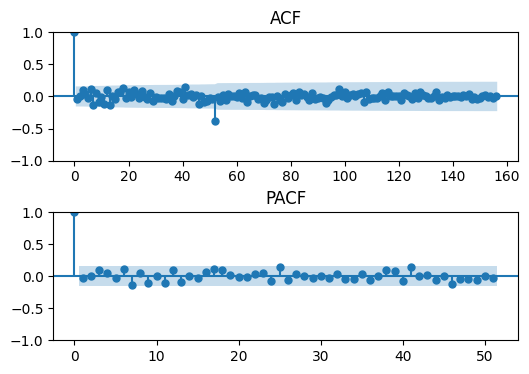

In [28]:
fig=plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0, hspace=0.4)


ax=fig.add_subplot(2,1,1)
plot_acf(data.diff(52).iloc[52:],lags=208-52,title='ACF',alpha=.05,ax=ax)

ax=fig.add_subplot(2,1,2)
plot_pacf(data.diff(52).iloc[52:],lags=103-52,title='PACF',ax=ax)

plt.show()

In [19]:
import datetime

In [20]:
init_date = data.index[len(data)-1].date()
print(init_date)
K=18

2018-12-27


In [21]:
dates = [init_date + datetime.timedelta(weeks=i) for i in range(1,K)]

In [22]:
dates

[datetime.date(2019, 1, 3),
 datetime.date(2019, 1, 10),
 datetime.date(2019, 1, 17),
 datetime.date(2019, 1, 24),
 datetime.date(2019, 1, 31),
 datetime.date(2019, 2, 7),
 datetime.date(2019, 2, 14),
 datetime.date(2019, 2, 21),
 datetime.date(2019, 2, 28),
 datetime.date(2019, 3, 7),
 datetime.date(2019, 3, 14),
 datetime.date(2019, 3, 21),
 datetime.date(2019, 3, 28),
 datetime.date(2019, 4, 4),
 datetime.date(2019, 4, 11),
 datetime.date(2019, 4, 18),
 datetime.date(2019, 4, 25)]

In [23]:
a=data.reset_index()
a


,date,demandas
0,2015-01-01,91
1,2015-01-08,87
2,2015-01-15,89
3,2015-01-22,89
4,2015-01-29,91
...,...,...
204,2018-11-29,89
205,2018-12-06,90
206,2018-12-13,91
207,2018-12-20,89


In [24]:
filtro_string = [f'(date>="201{i}/01/01" and date<"201{i}/05/01")' for i in range(5,9)]
filtro = filtro_string[0]+'or'+filtro_string[1]+'or'+filtro_string[2]+'or'+filtro_string[3]
date_filtrado = a.query(filtro)

In [25]:
for i in range(5,9):
    print(len(date_filtrado.query(f'date>="201{i}/01/01" and date<"201{i+1}/01/01"')['demandas']))

18
17
17
17


In [29]:
round(len(data.iloc[166:])/len(data),4)*100

20.57